In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

import pandas as pd
import matplotlib.pyplot as plt


# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="2944a580-6c5f-4258-8c86-b9c5de957998",
    resource_group_name="calebebraga08-rg",
    workspace_name="tcc-experiments",
)

In [2]:
TRAIN_DATA_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/train_data/"
TEST_DATA_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/test_data/"

TRAIN_DATAS = [
    "vrex_1999_2000_2001_2002_2003_.csv",
    "vrex_2004_2005_2006_2007_2008_.csv",
    "vrex_2009_2010_2011_2012_2013_.csv",
    "vrex_2014_2015_2016_2017_2018_.csv",
    "vrex_2019_2020_2021_.csv"
]

TEST_DATAS = [
    "vrex_2004.csv",
    "vrex_2009.csv",
    "vrex_2014.csv",
    "vrex_2019.csv"
]

v1 = "original"

In [3]:
def _remove_columns(df : pd.DataFrame) -> pd.DataFrame:
    return df.drop(columns=[  'lbl_exploits_delta_days',	
                        'lbl_exploits_weaponized_type_ENUM_absent',
                        'lbl_exploits_weaponized_type_ENUM_other',	
                        'lbl_exploits_weaponized_type_ENUM_auxiliary',
                        'lbl_exploits_weaponized_type_ENUM_exploit',
                        'lbl_exploits_weaponized_count',
                        'lbl_exploits_verified',
                        'idx',
                        'cve',
                        'lbl_exploits_has'
    ])

vrex_1999_2000_2001_2002_2003_.csv
shape original:  (8317, 885)
shape without null values:  (8317, 586)
removed columns:  299


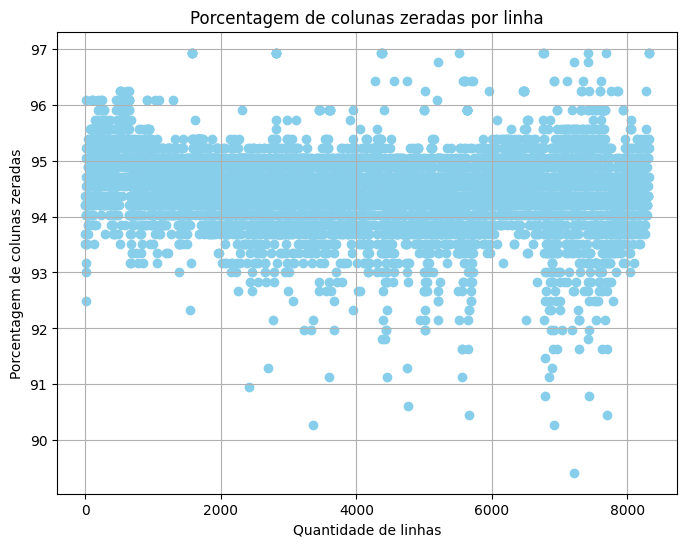

vrex_2004_2005_2006_2007_2008_.csv
shape original:  (28335, 885)
shape without null values:  (28335, 724)
removed columns:  161


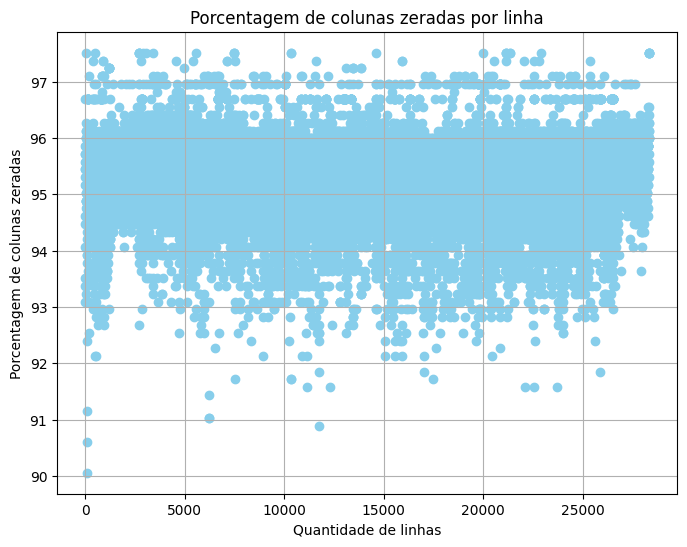

vrex_2009_2010_2011_2012_2013_.csv
shape original:  (27445, 885)
shape without null values:  (27445, 747)
removed columns:  138


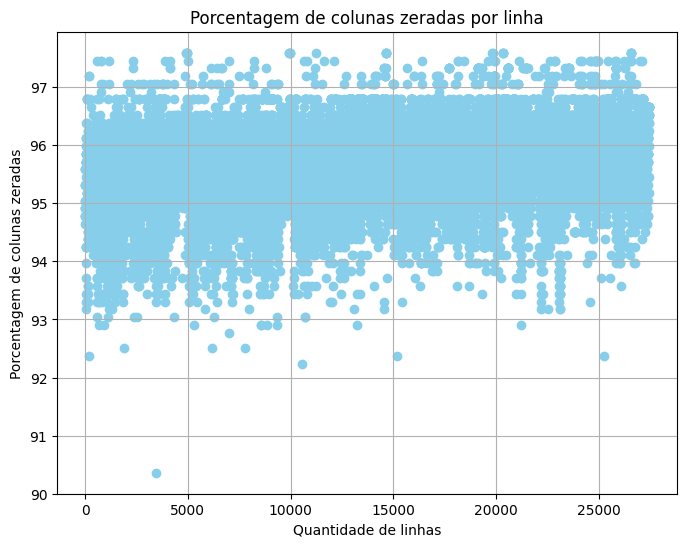

vrex_2014_2015_2016_2017_2018_.csv
shape original:  (60660, 885)
shape without null values:  (60660, 774)
removed columns:  111


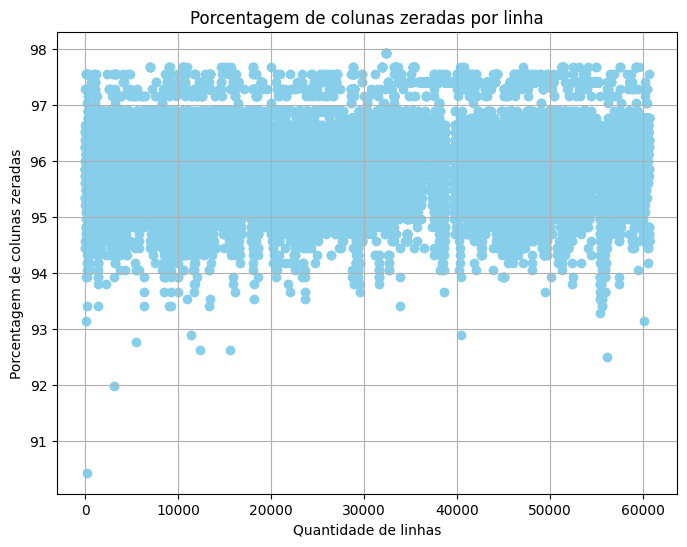

vrex_2019_2020_2021_.csv
shape original:  (32261, 885)
shape without null values:  (32261, 722)
removed columns:  163


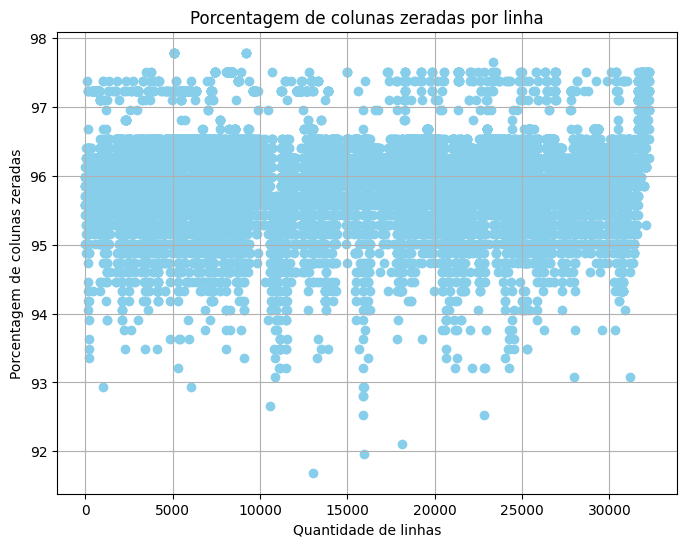

In [4]:
join_removed_columns = []

for df_name in TRAIN_DATAS:
    df_vrex = pd.read_csv(f"{TRAIN_DATA_PATH}{df_name}")
    print(df_name)
    
    print("shape original: ", df_vrex.shape)

    all_columns = df_vrex.columns.tolist()
    
    #remove columns where all values are null
    df_vrex = df_vrex.loc[:, (df_vrex != 0).any(axis=0)]
    
    removed_columns = [column for column in all_columns if column not in df_vrex.columns]
    print("shape without null values: ", df_vrex.shape)
    print("removed columns: ", len(removed_columns) )
    join_removed_columns.extend(removed_columns)

    #Calcular a quantidade de colunas
    columns_count = len(df_vrex.columns)

    #Calcular a porcentagem de colunas zeradas em cada linha
    row_by_null_columns_percents = (df_vrex == 0).sum(axis=1) / columns_count * 100

    #Ordenar o DataFrame de acordo com as porcentagens de colunas zeradas por linha
    #row_by_null_columns_percents_sorted = row_by_null_columns_percents.sort_values()
    #df_vrex_sorted = df_vrex.loc[row_by_null_columns_percents_sorted.index]

    #Plotar o gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(df_vrex.index, row_by_null_columns_percents, color='skyblue', marker='o', linestyle='-')
    plt.title('Porcentagem de colunas zeradas por linha')
    plt.xlabel('Quantidade de linhas')
    plt.ylabel('Porcentagem de colunas zeradas')
    plt.grid(True)
    plt.show()





In [5]:
join_removed_columns = list(set(join_removed_columns))
print("join removed columns:", join_removed_columns, "len: ", len(join_removed_columns))

join removed columns: ['reference_type_ENUM_turbo', 'vendor_ENUM_woltlab', 'description_ENUM_ruby', 'vendor_ENUM_w1_fi', 'vendor_ENUM_sugarcrm', 'description_ENUM_imagemagick', 'reference_type_ENUM_el8', 'vendor_ENUM_qnap', 'vendor_ENUM_nginx', 'vendor_ENUM_ffmpeg', 'vendor_ENUM_freedesktop', 'description_ENUM_cpanel', 'vendor_ENUM_xfree86_project', 'vendor_ENUM_axis', 'vendor_ENUM_ssh', 'vendor_ENUM_jetbrains', 'vendor_ENUM_alt-n', 'vendor_ENUM_opensuse', 'vendor_ENUM_aspindir', 'description_ENUM_ac', 'vendor_ENUM_mitel', 'vendor_ENUM_octopus', 'vendor_ENUM_mattermost', 'vendor_ENUM_elasticsearch', 'vendor_ENUM_ntp', 'vendor_ENUM_libarchive', 'phase_ENUM_proposed', 'vendor_ENUM_arm', 'vendor_ENUM_djangoproject', 'vendor_ENUM_jelsoft', 'reference_type_ENUM_checkpoint', 'vendor_ENUM_veritas', 'vendor_ENUM_fedoraproject', 'vendor_ENUM_piwigo', 'vendor_ENUM_dlink', 'reference_type_ENUM_secunia', 'reference_type_ENUM_l0pht', 'vendor_ENUM_pulsesecure', 'description_ENUM_parsing', 'reference

# Histograma da porcentagem de linhas zeradas de cada coluna

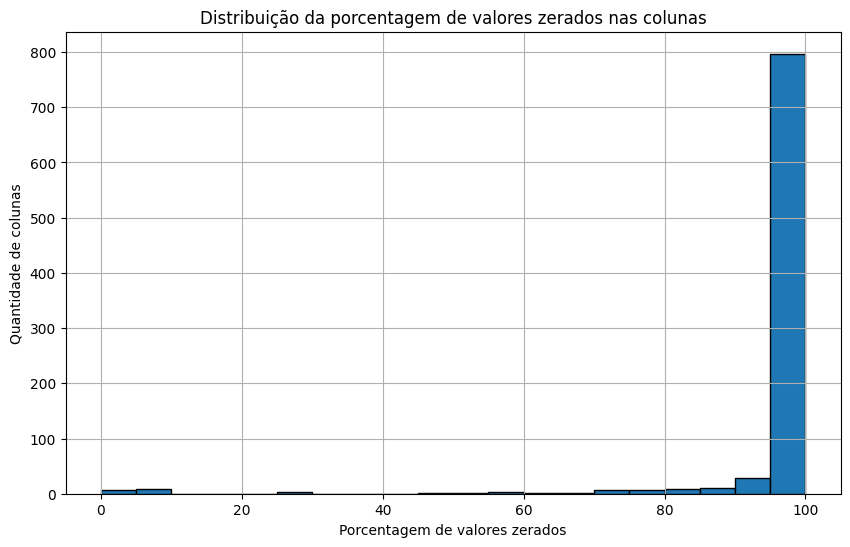

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o dataset
VREX_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/vrex.csv"
df_vrex = pd.read_csv(VREX_PATH)

# Removendo colunas onde todos os valores são zeros
all_columns = df_vrex.columns.tolist()
df_vrex = df_vrex.loc[:, (df_vrex != 0).any(axis=0)]
removed_columns = [column for column in all_columns if column not in df_vrex.columns]

# Calculando a porcentagem de valores zerados em cada coluna
zero_percentage = (df_vrex == 0).mean() * 100

# Plotando o histograma
plt.figure(figsize=(10, 6))
plt.hist(zero_percentage, bins=20, edgecolor='black')
plt.xlabel('Porcentagem de valores zerados')
plt.ylabel('Quantidade de colunas')
plt.title('Distribuição da porcentagem de valores zerados nas colunas')
plt.grid(True)
plt.show()


# Histograma da porcentagem de colunas zeradas de cada linha

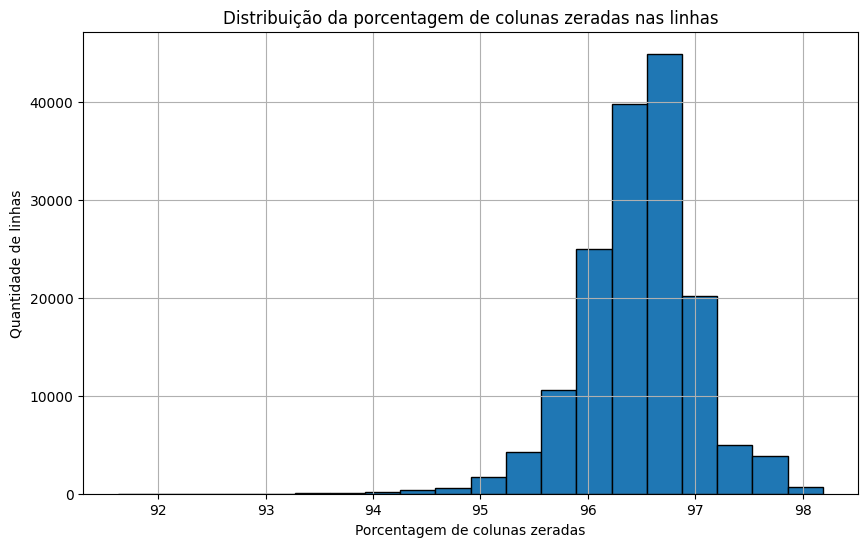

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o dataset
VREX_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/vrex.csv"
df_vrex = pd.read_csv(VREX_PATH)

# Removendo colunas onde todos os valores são zeros
all_columns = df_vrex.columns.tolist()
df_vrex = df_vrex.loc[:, (df_vrex != 0).any(axis=0)]
removed_columns = [column for column in all_columns if column not in df_vrex.columns]

# Calculando o percentual de colunas zeradas para cada linha
zero_percentage_row = (df_vrex == 0).mean(axis=1) * 100

# Plotando o histograma
plt.figure(figsize=(10, 6))
plt.hist(zero_percentage_row, bins=20, edgecolor='black')
plt.xlabel('Porcentagem de colunas zeradas')
plt.ylabel('Quantidade de linhas')
plt.title('Distribuição da porcentagem de colunas zeradas nas linhas')
plt.grid(True)
plt.show()


# Histograma da porcentagem de linhas zeradas de cada coluna em cada categoria - ['cvss', 'description', 'reference', 'vendor', 'other']

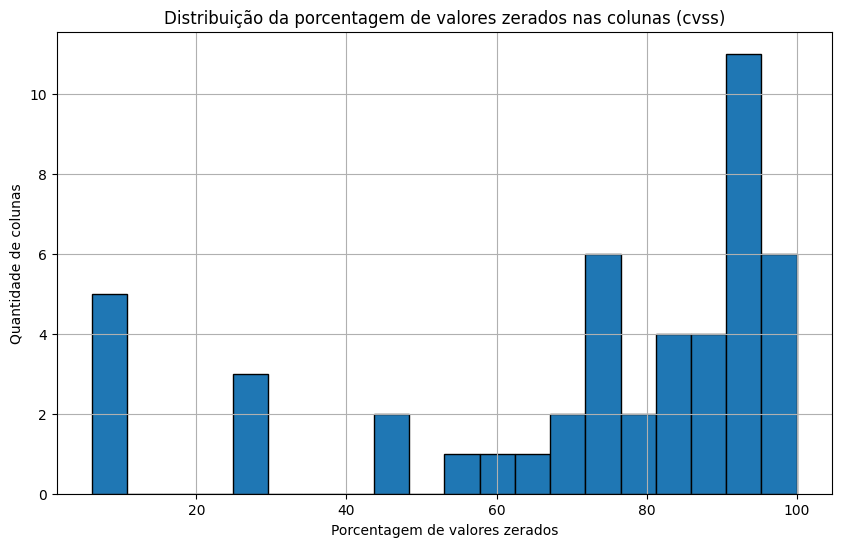

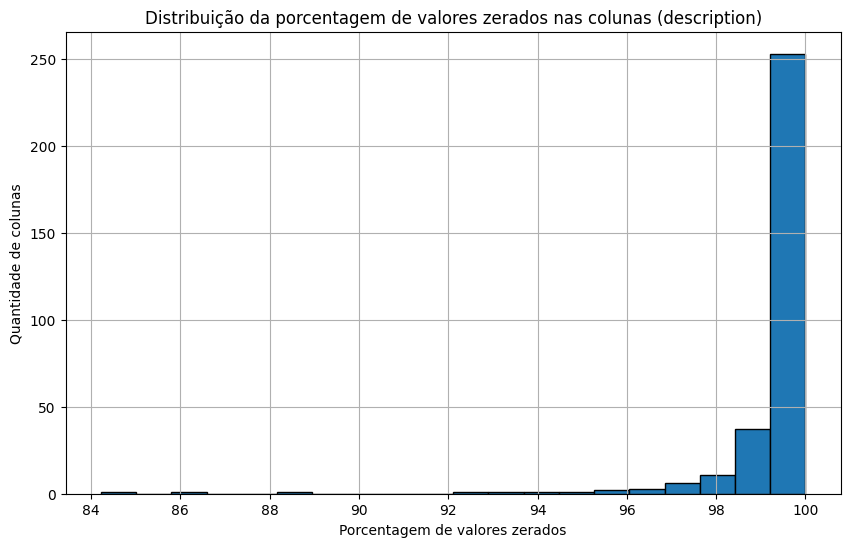

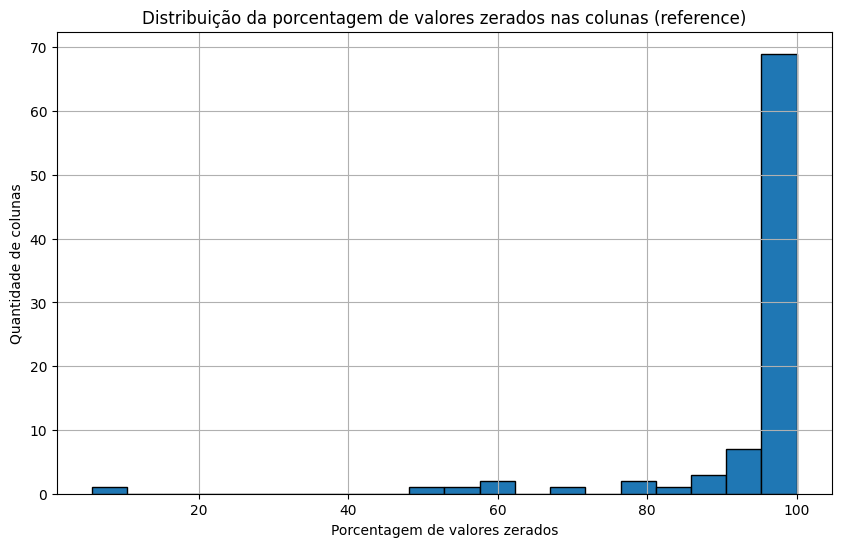

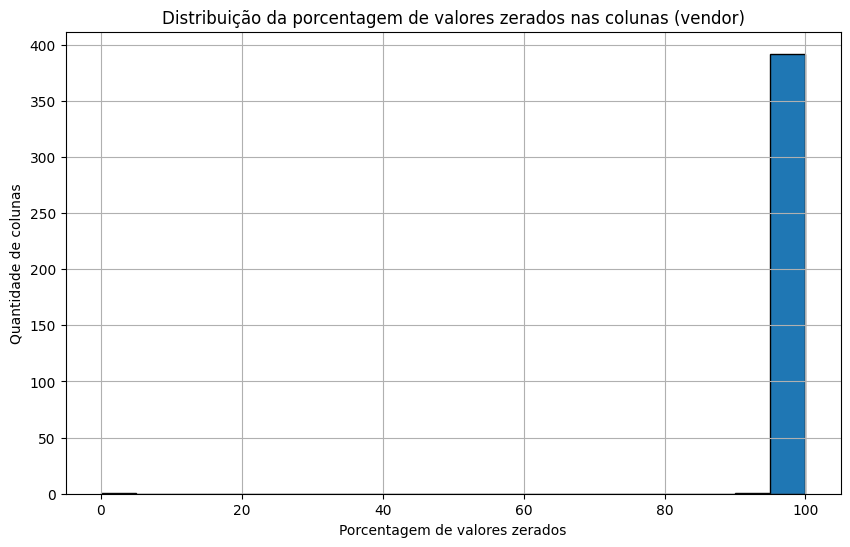

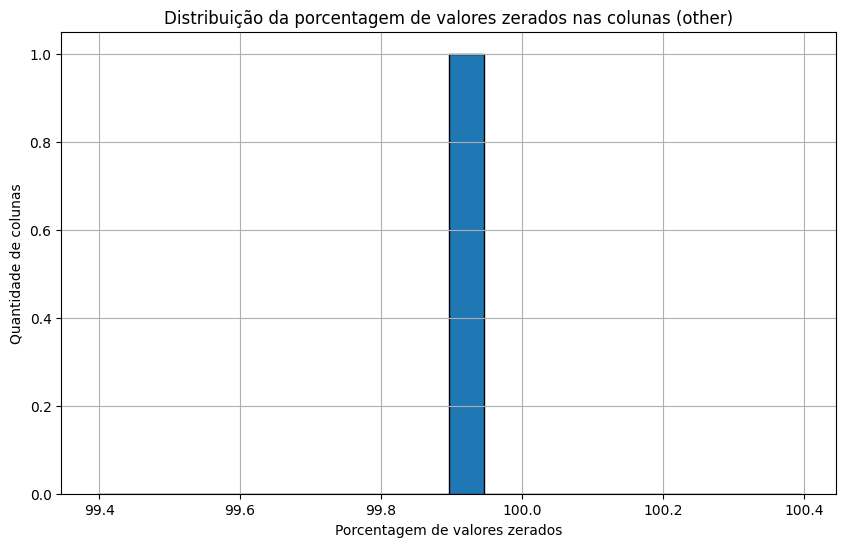

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o dataset
VREX_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/vrex.csv"
df_vrex = pd.read_csv(VREX_PATH)

# Identificando e separando as colunas por categoria
categorias = ['cvss', 'description', 'reference', 'vendor', 'other']
dfs_por_categoria = {}

for categoria in categorias:
    colunas_categoria = [coluna for coluna in df_vrex.columns if categoria in coluna]
    df_categoria = df_vrex[colunas_categoria].copy()
    dfs_por_categoria[categoria] = df_categoria

# Calculando a porcentagem de valores zerados em cada coluna para cada categoria
zero_percentage_por_categoria = {}

for categoria, df_categoria in dfs_por_categoria.items():
    zero_percentage = (df_categoria == 0).mean() * 100
    zero_percentage_por_categoria[categoria] = zero_percentage

# Plotando os histogramas para cada categoria
for categoria, zero_percentage in zero_percentage_por_categoria.items():
    plt.figure(figsize=(10, 6))
    plt.hist(zero_percentage, bins=20, edgecolor='black')
    plt.xlabel('Porcentagem de valores zerados')
    plt.ylabel('Quantidade de colunas')
    plt.title(f'Distribuição da porcentagem de valores zerados nas colunas ({categoria})')
    plt.grid(True)
    plt.show()


# Histograma da porcentagem de colunas zeradas de cada linha em cada categoria - 'cvss', 'description', 'reference', 'vendor', 'other'

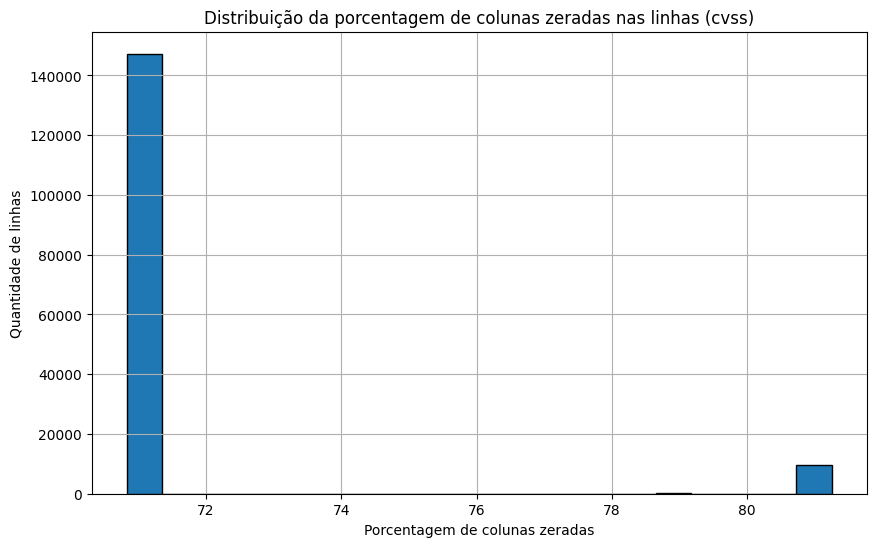

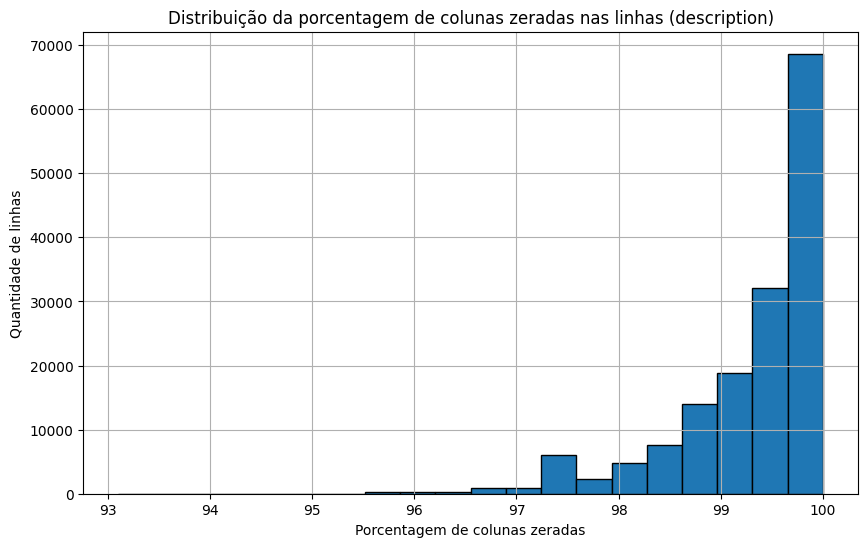

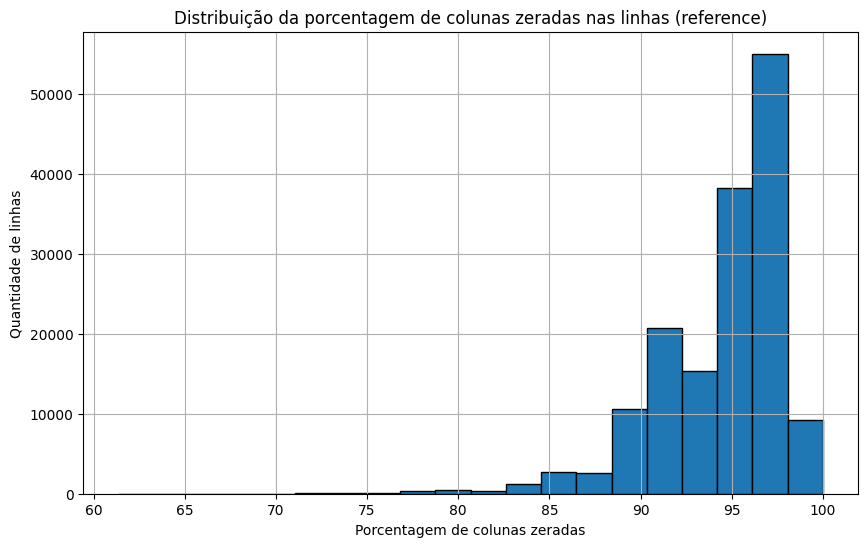

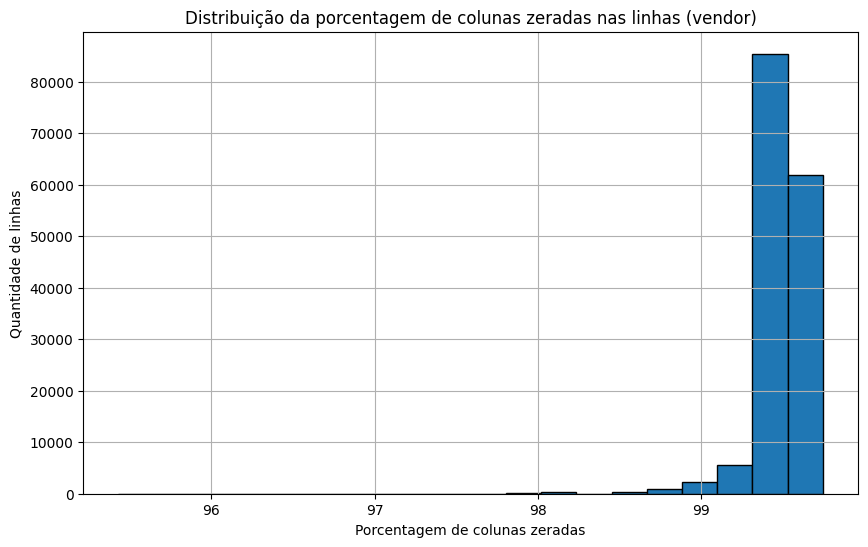

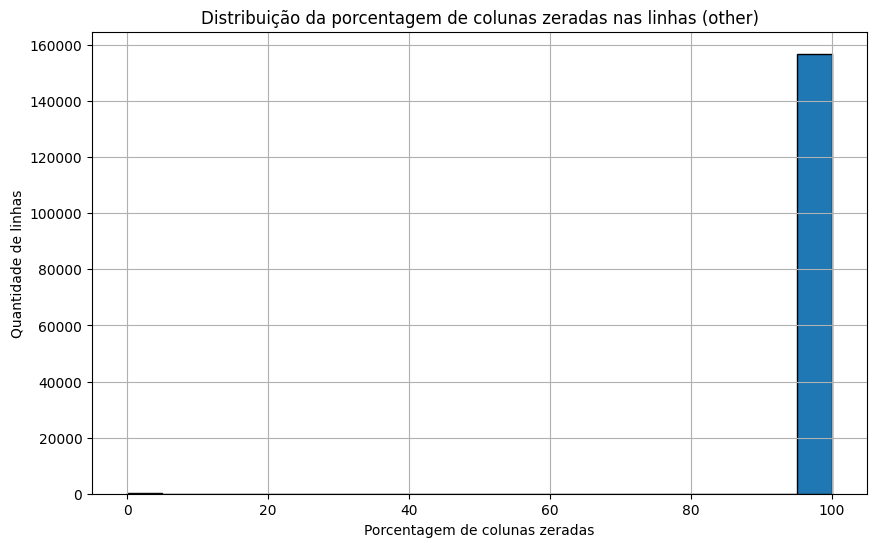

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o dataset
VREX_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/vrex.csv"
df_vrex = pd.read_csv(VREX_PATH)

# Identificando e separando as colunas por categoria
categorias = ['cvss', 'description', 'reference', 'vendor', 'other']
dfs_por_categoria = {}

for categoria in categorias:
    colunas_categoria = [coluna for coluna in df_vrex.columns if categoria in coluna]
    df_categoria = df_vrex[colunas_categoria].copy()
    dfs_por_categoria[categoria] = df_categoria

# Calculando a porcentagem de colunas zeradas em cada linha para cada categoria
zero_percentage_colunas_por_categoria = {}

for categoria, df_categoria in dfs_por_categoria.items():
    zero_percentage_colunas = (df_categoria == 0).mean(axis=1) * 100
    zero_percentage_colunas_por_categoria[categoria] = zero_percentage_colunas

# Plotando os histogramas para cada categoria
for categoria, zero_percentage_colunas in zero_percentage_colunas_por_categoria.items():
    plt.figure(figsize=(10, 6))
    plt.hist(zero_percentage_colunas, bins=20, edgecolor='black')
    plt.xlabel('Porcentagem de colunas zeradas')
    plt.ylabel('Quantidade de linhas')
    plt.title(f'Distribuição da porcentagem de colunas zeradas nas linhas ({categoria})')
    plt.grid(True)
    plt.show()


In [11]:
import pandas as pd

# Carregando o dataset
VREX_PATH = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-standard-e4ds-v4/code/Users/calebebraga08/data/vrex.csv"
df_vrex = pd.read_csv(VREX_PATH)

# Removendo as colunas específicas
df_vrex = df_vrex.drop(columns=['lbl_exploits_delta_days',	
                                'lbl_exploits_weaponized_type_ENUM_absent',
                                'lbl_exploits_weaponized_type_ENUM_other',	
                                'lbl_exploits_weaponized_type_ENUM_auxiliary',
                                'lbl_exploits_weaponized_type_ENUM_exploit',
                                'lbl_exploits_weaponized_count',
                                'lbl_exploits_verified',
                                'idx',
                                'cve',
                                'lbl_exploits_has'
                               ])

# Calculando o percentual de valores iguais a zero em cada coluna
zero_percentage = (df_vrex == 0).mean()

# Definindo um limiar para o percentual de valores iguais a zero (por exemplo, 99%)
threshold = 0.9

# Selecionando as colunas que têm um percentual de valores iguais a zero acima do limiar
columns_to_remove = zero_percentage[zero_percentage <= threshold].index.tolist()

# Removendo as colunas selecionadas do DataFrame
df_vrex = df_vrex.drop(columns=columns_to_remove)

print(len(columns_to_remove))  # Imprime o número de colunas removidas
print(len(df_vrex.columns.tolist()))  # Imprime o número de colunas restantes


822
53
